In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#Mengubah jenis data kategorikal pada variabel Outcome
df["Outcome"] = df["Outcome"].astype('category')
df.dtypes

Pregnancies                    int64
Glucose                        int64
BloodPressure                  int64
SkinThickness                  int64
Insulin                        int64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                            int64
Outcome                     category
dtype: object

In [6]:
#Memeriksa missing value setiap variabel
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

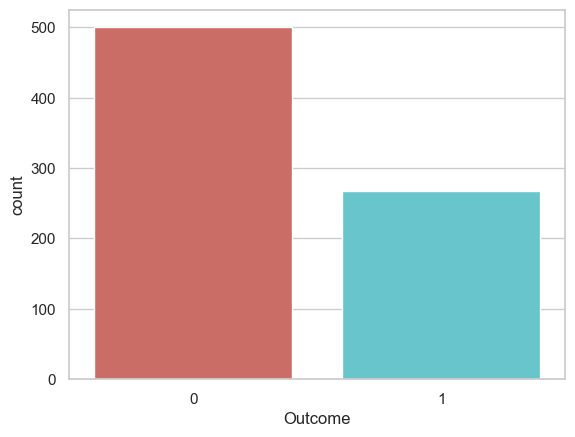

<Figure size 640x480 with 0 Axes>

In [7]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x='Outcome',data=df,palette='hls')
plt.show()
plt.savefig('count_plot')  

C:\Users\mukti\AppData\Local\Temp\ipykernel_26440\488918519.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[column], kde=True, palette='viridis')
C:\Users\mukti\AppData\Local\Temp\ipykernel_26440\488918519.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[column], kde=True, palette='viridis')
C:\Users\mukti\AppData\Local\Temp\ipykernel_26440\488918519.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[column], kde=True, palette='viridis')
C:\Users\mukti\AppData\Local\Temp\ipykernel_26440\488918519.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[column], kde=True, palette='viridis')
C:\Users\mukti\AppData\Local\Temp\ipykernel_26440\488918519.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[column], kde=True, palette='viridis')
C:\Us

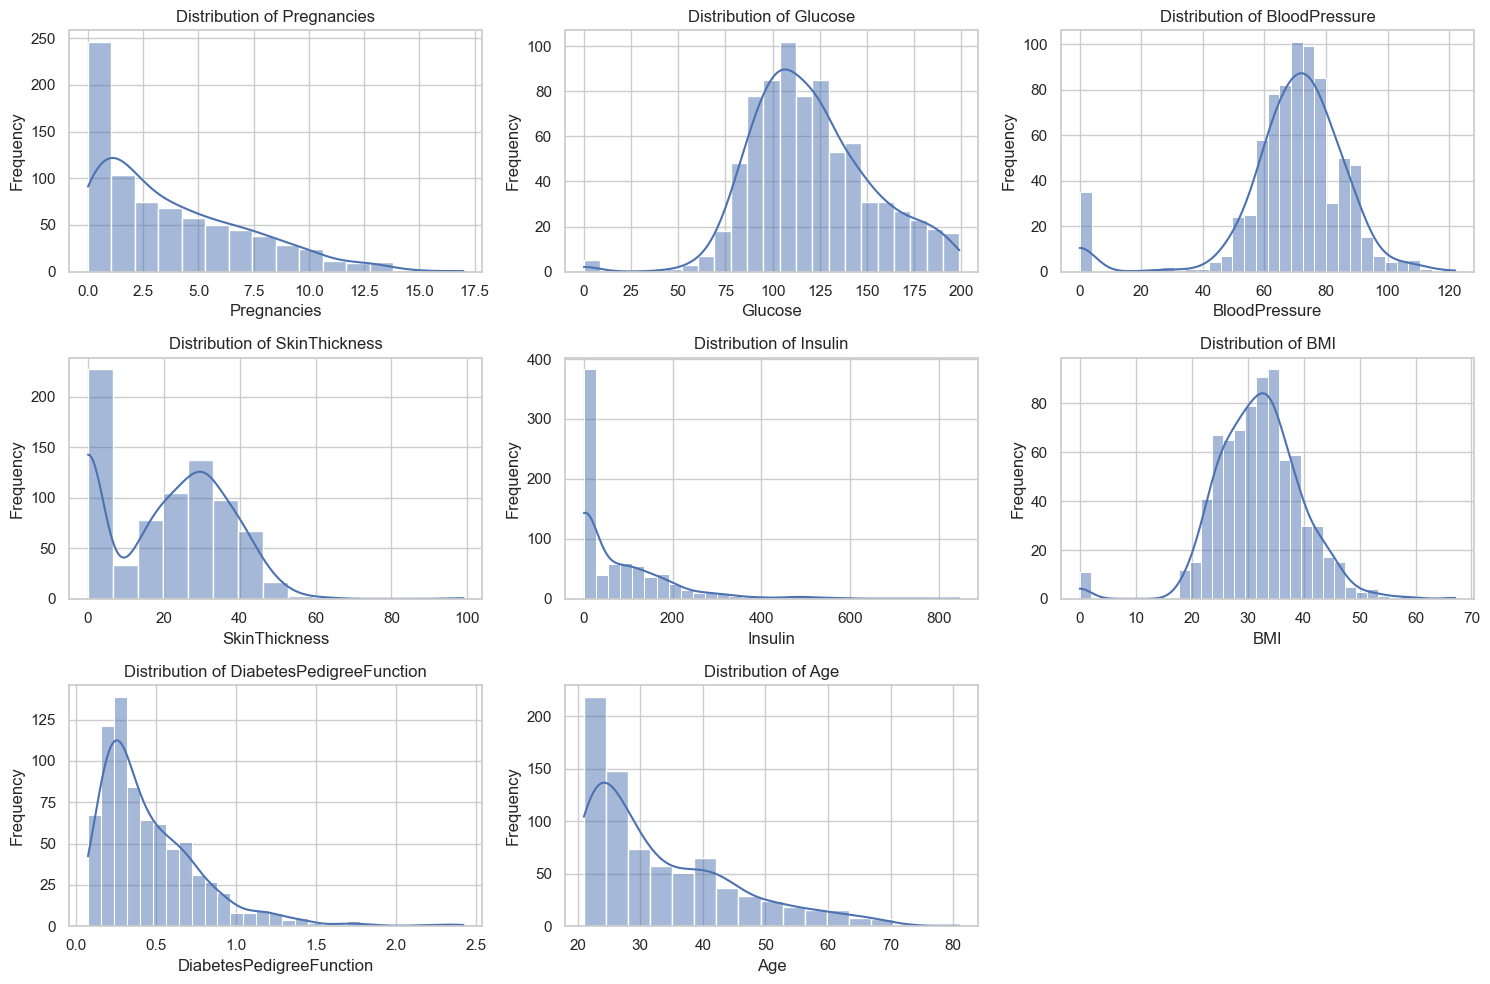

In [8]:
# Distribusi fitur-fitur numerik
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True, palette='viridis')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

C:\Users\mukti\AppData\Local\Temp\ipykernel_26440\933723240.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


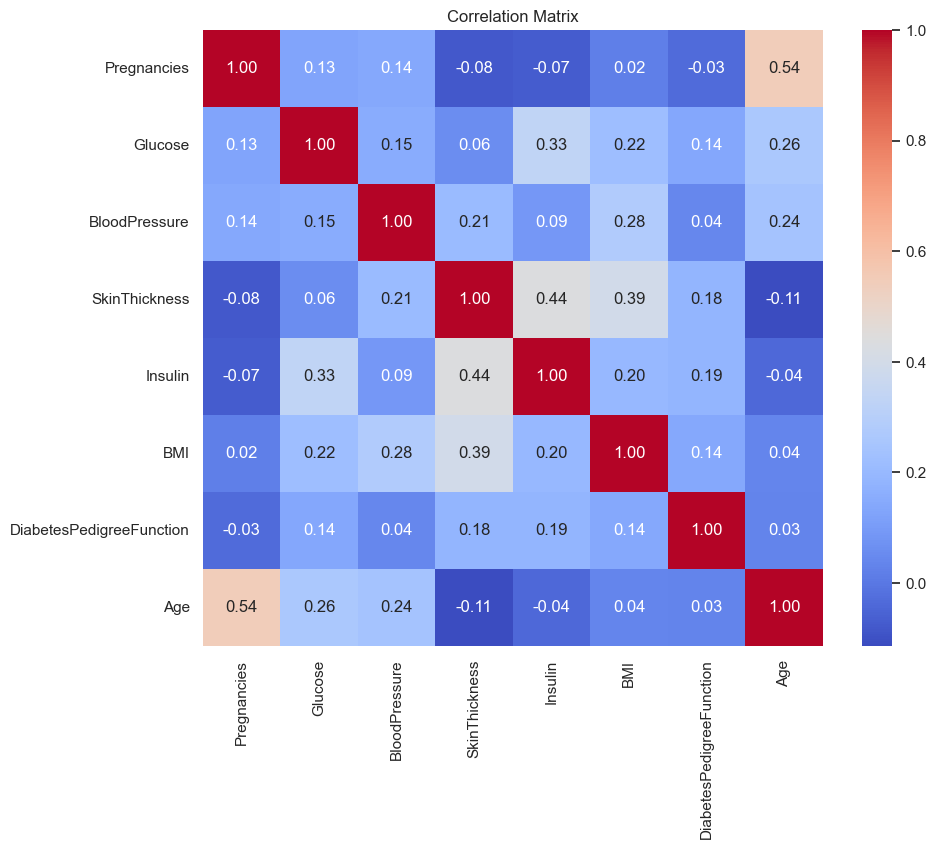

In [9]:
# Korelasi antar fitur
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [10]:
#Transforming variabel prediktor dengan metode MinMaxScaler
from sklearn import preprocessing
transformasi_min_max=preprocessing.MinMaxScaler()

In [11]:
#Membagi data menjadi variabel target dan atribut
target = 'Outcome'
x = df.drop('Outcome', axis=1)
y =df[target]
nama_var_x=['Pregnancies','Glucose','BloodPressure','SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
x = pd.DataFrame(data=transformasi_min_max.fit_transform(x), columns=nama_var_x)

In [12]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


In [13]:
#Melihat seberapa banyak nilai 1 dan 0 pada Variabel Outcome
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [14]:
#Membagi data menjadi data training dan data testing (80% Training dan 20% Testing)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [15]:
# Normalisasi data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Regresi Logistik

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(x_train_scaled, y_train)

LogisticRegression()

In [17]:
y_pred = logreg.predict(x_test_scaled)


In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[89 10]
 [24 31]]


In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.56      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154



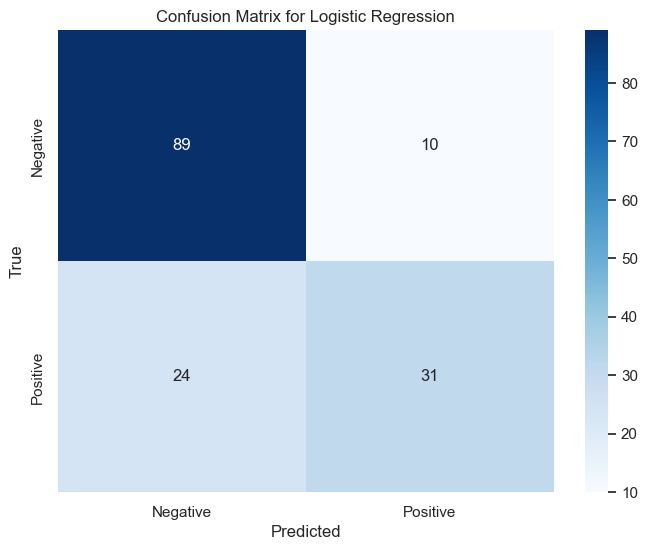

In [20]:
# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Naive Bayes

In [21]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

naive_bayes_model = GaussianNB()
naive_bayes_model.fit(x_train_scaled, y_train)

GaussianNB()

In [22]:
y_pred = naive_bayes_model.predict(x_test_scaled)

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[85 14]
 [21 34]]


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        99
           1       0.71      0.62      0.66        55

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



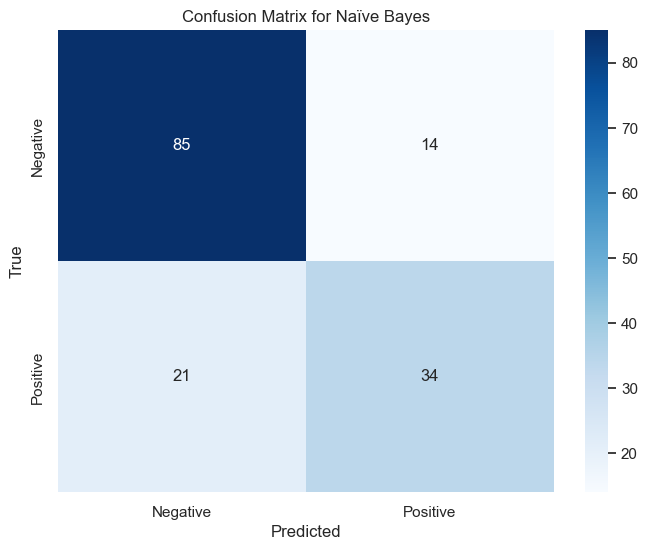

In [25]:
# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for Naïve Bayes')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

In [27]:
# Memprediksi data uji
y_pred = decision_tree_model.predict(x_test_scaled)

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.79      0.76        99
           1       0.57      0.51      0.54        55

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.68      0.69      0.68       154



In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[78 21]
 [27 28]]


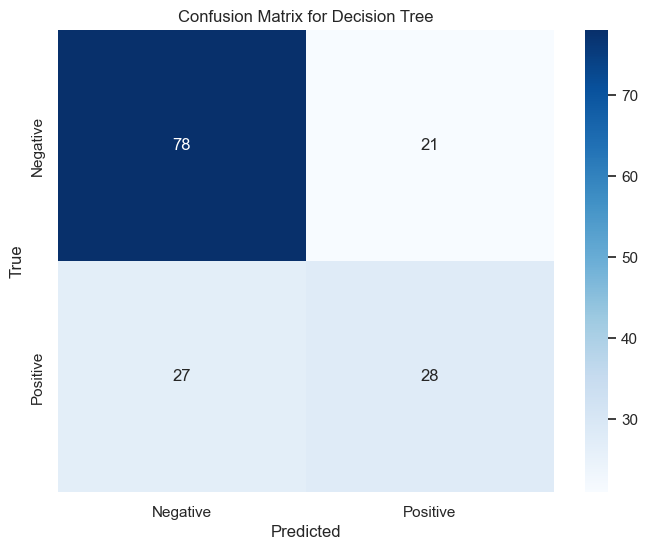

In [30]:
# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()